# Statistial Inference in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# Chapter 6 in the Book

## Create two empty vectors, x1 and x2. Now do a for loop 100 times, where you for each iteration: 
## 1) Take the mean of 100 samples from $N(10, 5)$ and store it in x1. 
## 2) Take the mean of 100 samples from $N(10, 20)$ and store it in x2.

## So, your vectors x1 and x2 should contain 100 values. 

## From p.148 in the book, we know that the mean is an unbiased estimate of the fixed, but unknown $\mu$. The nice thing is that in our Monte Carlo Simulation we know the true $\mu$. Plot histograms of x1 and x2 and comment on the result, do we on "average" get the right mean? Is it easier or harder to estimate the mean when the variance is low/high? How is this knowledge useful in reality?

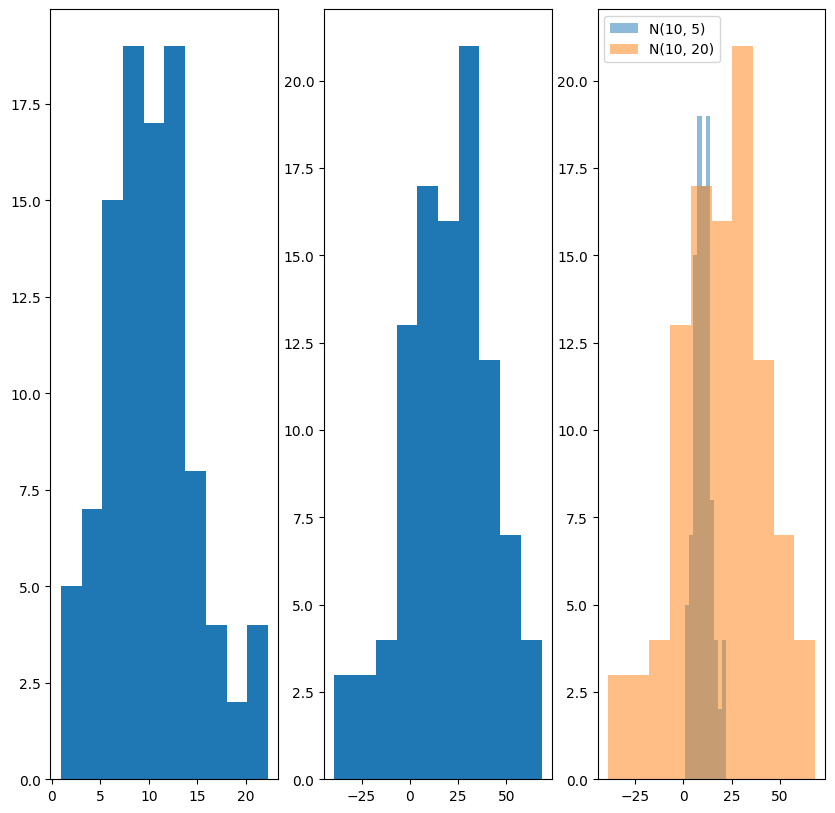

In [2]:
# Generating data.
x1 = scipy.stats.norm.rvs(loc=10, scale=5, size=100)
x2 = scipy.stats.norm.rvs(loc=20, scale=20, size=100)

# Creating plot.
fig, axs = plt.subplots(1, 3, figsize=(10, 10) )
axs[0].hist(x1)
axs[1].hist(x2)
axs[2].hist(x1, alpha=0.5, label='N(10, 5)')
axs[2].hist(x2, alpha=0.5, label='N(10, 20)')
axs[2].legend()

## Redo the same analysis as above but with 10000 generated samples and see if there is any difference (copy the code from above). Comment on the results. 

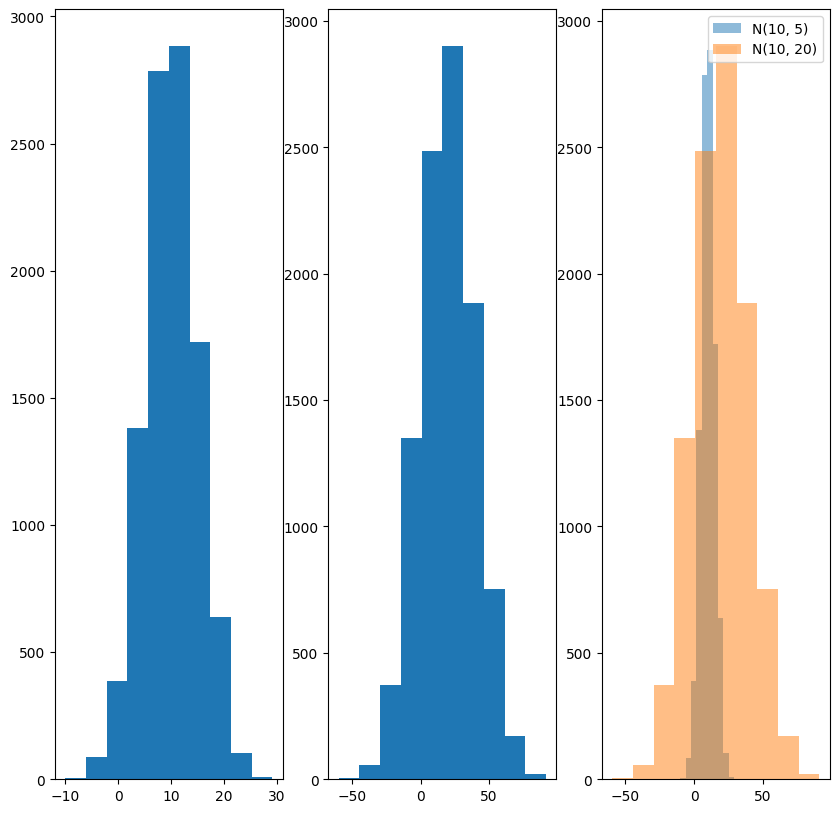

In [3]:
# Generating data.
x1 = scipy.stats.norm.rvs(loc=10, scale=5, size=10000)
x2 = scipy.stats.norm.rvs(loc=20, scale=20, size=10000)

# Creating plot.
fig, axs = plt.subplots(1, 3, figsize=(10, 10) )
axs[0].hist(x1)
axs[1].hist(x2)
axs[2].hist(x1, alpha=0.5, label='N(10, 5)')
axs[2].hist(x2, alpha=0.5, label='N(10, 20)')
axs[2].legend()

# Chapter 7 - Confidence Intervals

Assuming $X$ is $N(10, 3)$, we know (see example calculation below) that a random sample x will with probability 95% be between: <br>
ci_lower = 10 - 1.96 x 3 <br> and <br>
ci_upper = 10 + 1.96 x 3

Example, for the ci_upper, we do the following calculation: $P(X > ci\_upper) = P(X > 10 + 1.96 * 3) = P(Z > 1.96) = 0.025$ where we used the usual standardization. 

This means that if you get observations from the normal distribution above, you would "expect" 95 \% of them to be between ci_lower and ci_upper. 

Your task is now to simulate 10, 100, 1000 and 10000 normally distributed samples from $N(10, 3)$ and check the relative frequency (\%) of how many samples fall outside the confidence interval. How many \% should it theoretically be?

In [4]:
ci_lower = 10 - 1.96*3
ci_upper = 10 + 1.96*3

print(ci_lower)
print(ci_upper)

4.12
15.879999999999999


In [5]:
# Change the size argument to explore what happens
x = scipy.stats.norm.rvs(loc=10, scale=3, size=100)

results = []
for i in(x):
    if (i < ci_lower or i > ci_upper):
        results.append(1)
    else:
        results.append(0)


In [6]:
# print(x)
print()

print(results)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [7]:
# Printing the relative frequency, the more observations, the "closer" we get to 5% that is not in the confidence interval. 
np.mean(results)

0.05

## Assume you have 100 observations from N(10, 3), you calculate a confidence interval and check if it "captures" the real $\mu$ (we know the reality since we are doing a monte carlo simulation), how often do you "capture" the real mu (in \%) when you repeat this 1000 times? How is this knowledge useful in reality?

## Note, the difference between this question and the one above is that here we calculate the sample mean and sample standard deviation to construct confidence intervals whereas above we used that we "knew the reality" ($\mu$ and $\sigma$), i.e. ci_lower <- 10 - 1.96*3 and  ci_upper <- 10 + 1.96*3. Obviosuly, this is not the case in reality.


In [8]:
results = []
for i in range(1, 1000):
    mu = 10
    x = scipy.stats.norm.rvs(loc=mu, scale=3, size=100)

    ci_lower = np.mean(x) - 1.96*((np.std(x))/len(x)**0.5)
    ci_upper = np.mean(x) + 1.96*((np.std(x))/len(x)**0.5)
    
    if mu >= ci_lower and mu <= ci_upper:
        results.append(1)
    else:
        results.append(0)

print(np.mean(results))

0.964964964964965


## Confidence Intervals for proportions. 
So far, we have looked at confidence intervals for $\mu$. Often, we are also interested in proportions, $\pi$, this is for instance the case in elections that get much attention at TV and "nyhetsmorgon". 

## Assume we ask 1000 people who they will vote for and 4.2% answer Centerpartiet (C). Create a 90% Confidence Interval to get the proportion that would vote for C if we surveyed the whole population ("Totalundersökning"). OBS: note we want a 90% confidence interval.

In [9]:
p = 0.042
n = 1000
z = 1.6449
s_p = np.sqrt(p*(1-p)/n)

ci_lower = p - z*s_p
ci_upper = p + z*s_p

print(ci_lower)
print(ci_upper)

0.031566094467632935
0.05243390553236707


## For this question see (p. 177 - 178) in the book. We ask 1000 people who they will vote for, 4.2% answer Centerpartiet (C) and 4.5% answer Liberalerna (L), is there a statistical significant difference between the two parties? 

## Check if the assumption on  np(1-p) > 5 is satisfied for both poportions.

In [10]:
p1 = 0.042
p2 = 0.045
n = 1000

z = 1.96

s = np.sqrt(((p1 + p2)/n) - (((p1 - p2)**2)/n))

ci_lower = (p1 - p2) - z*s
ci_upper = (p1 - p2) + z*s

print(ci_lower)
print(ci_upper)

-0.021280717316341822
0.01528071731634183


In [11]:
# Checking assumption of np(1-p) > 5 for both poportions. 
print(n*p1*(1-p1))
print(n*p2*(1-p2))

40.236
42.975


# Chapter 8 - Hypothesis Testing
In the code below, can we reject the hypothesis that $\mu = 5$ ? Can we reject the hypothesis that $\mu = 0$ ? How do you interpret the p-value?

Read the following documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

In [12]:
x = scipy.stats.norm.rvs(loc = 0, scale = 4, size = 100)

In [13]:
print(scipy.stats.ttest_1samp(x, 5))

TtestResult(statistic=-12.956326539558363, pvalue=4.8259693624848447e-23, df=99)


In [14]:
print(scipy.stats.ttest_1samp(x, 0))

TtestResult(statistic=-0.9214042098572259, pvalue=0.3590793722949297, df=99)
